<a href="https://colab.research.google.com/github/DrDourado/Teaching_ME_615/blob/main/ME_615_09_Basics_of_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 This notebook illustrates the concept of Principal Component Analysis (PCA). PCA is a statistical technique used for dimensionality reduction. Dimensionality Reduction is used to reduce the number of features (dimensions) in a dataset while retaining most of the important information. This is particularly useful when dealing with high-dimensional data where visualization, analysis, or modeling becomes challenging. It is achieved by transforming a dataset consisting of possibly correlated variables into a set of linearly uncorrelated variables called principal components. These principal components are ordered in such a way that the first few capture the maximum variance in the data.

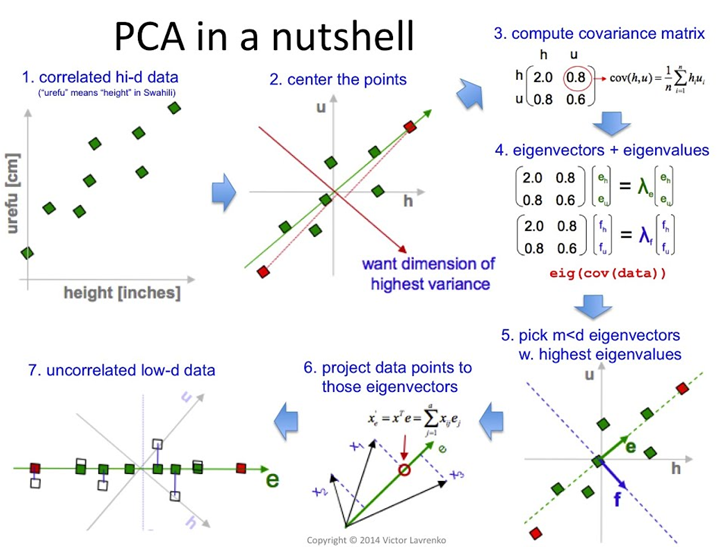

In this notebook you'll find steps illustrating the main aspects of PCA:

1. **Dimensionality Reduction -**  PCA performs dimensionality reduction by transforming the original high-dimensional data into a new lower-dimensional space while preserving the maximum amount of variance present in the original data. This is achieved through the following steps:

* Standardization: PCA typically starts with standardizing the features to have a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the analysis and prevents features with larger scales from dominating the variance calculation.

* Computing the Covariance Matrix: PCA computes the covariance matrix of the standardized data. The covariance matrix provides information about the relationships between different features in the dataset. The diagonal elements of the covariance matrix represent the variance of each feature, while the off-diagonal elements represent the covariance between pairs of features.

* Eigenvalue Decomposition: PCA then performs eigenvalue decomposition (or Singular Value Decomposition, SVD) on the covariance matrix to obtain its eigenvectors and eigenvalues. The eigenvectors represent the directions (or principal components) of maximum variance in the original data, while the corresponding eigenvalues indicate the amount of variance explained by each eigenvector.

* Selecting Principal Components: PCA sorts the eigenvectors in descending order of their corresponding eigenvalues. The eigenvectors with the highest eigenvalues (i.e., those that explain the most variance) are selected as the principal components. These principal components define a new orthogonal coordinate system in which the data will be projected.

* Projection: Finally, PCA projects the original data onto the subspace spanned by the selected principal components. Each data point is represented by a linear combination of the principal components, effectively reducing the dimensionality of the dataset.

By selecting a subset of the principal components that capture most of the variance in the data, PCA achieves dimensionality reduction while preserving the essential structure and relationships within the dataset. The reduced-dimensional representation obtained through PCA can be used for various tasks such as visualization, clustering, classification, or regression, often leading to improved computational efficiency and interpretability.

2. **Explained Variance Ratio:** The explained variance ratio indicates the proportion of variance in the original data that is captured by each principal component. Higher values indicate that the corresponding principal component retains more information from the original data.

3. **Total Variance Explained:** This is the cumulative sum of explained variance ratios across all principal components. It gives an overall measure of how much of the original variance in the data is retained after dimensionality reduction.

PCA is widely used in various fields including machine learning, signal processing, image analysis, and finance for tasks such as feature extraction, data visualization, noise reduction, and compression. It is an essential tool for data preprocessing and exploratory data analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load sample dataset (Wine dataset)
wine = load_wine()

In [3]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
X = wine.data
y = wine.target

In [6]:
X.shape,np.unique(y).shape # 13 different features are used to predict the type of wine out of 3 possible wines.

((178, 13), (3,))

In [7]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

**Original Plot:**

* In the original plot, each data point is represented by its original features (e.g., feature 1 and feature 2).

* Each feature corresponds to one dimension in the dataset, so the original plot visualizes the data in its original high-dimensional space (2 dimensions out of the 13 total possible dimensions in this dataset).

* The data points may exhibit complex patterns or overlap due to the impact of multiple implicit features not illustrated in the plots, making it difficult to discern any underlying structure, or to properly distinguish all *n* classes.

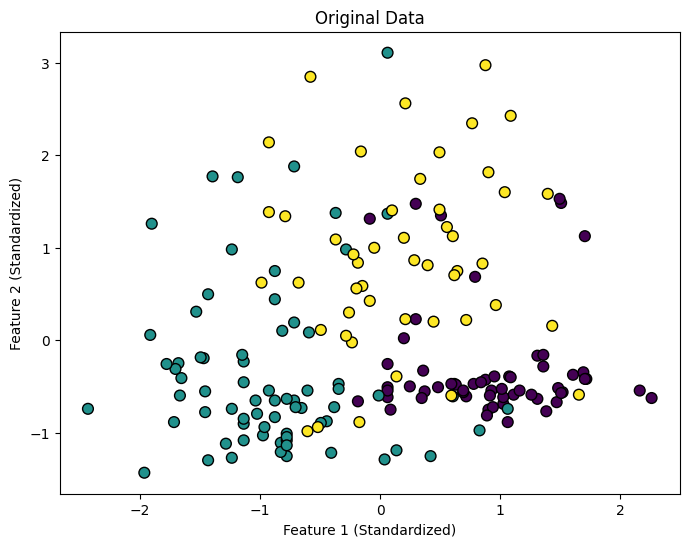

In [9]:
# Plot original data
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolor='k', s=60)
plt.title('Original Data')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

**Data Visualization after PCA:**

* In the data visualization after PCA, each data point is represented by its principal components (e.g., principal component 1 and principal component 2).
* The x-axis now represents the first principal component, which captures the direction of maximum variance in the original data.
* The y-axis represents the second principal component, orthogonal to the first, capturing the second highest variance in the data.
* By projecting the data onto these principal components, PCA effectively reduces the dimensionality of the dataset while retaining most of its variance.
* The data visualization after PCA often reveals clearer patterns or clusters in the data, as the principal components are chosen to maximize the separation between data points along the directions of maximum variance.


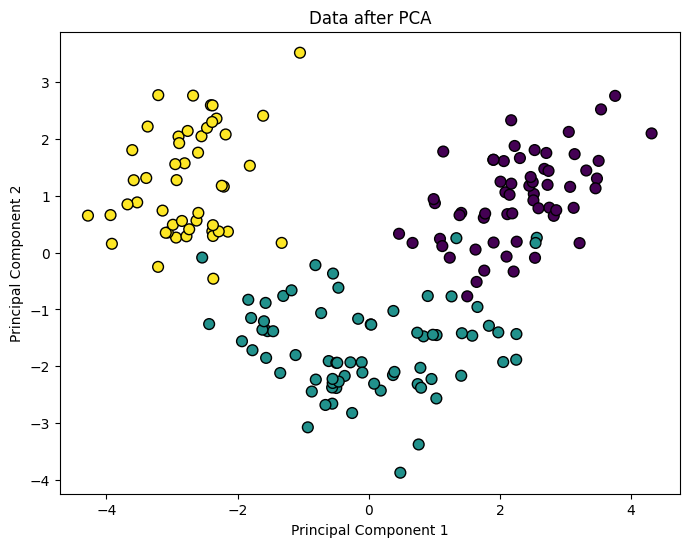

In [10]:
# Plot data after PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=60)
plt.title('Data after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Explained variance ratio:** The explained variance ratio is a crucial concept in Principal Component Analysis (PCA). It quantifies the proportion of variance in the original dataset that is captured by each principal component. Here's a detailed explanation of the results related to the explained variance ratio:
* For each principal component obtained through PCA, there is an associated explained variance ratio.
* The explained variance ratio for a principal component indicates the proportion of variance in the original data that is explained by that specific principal component.
* Typically, these ratios are normalized to sum up to 1, making them interpretable as percentages.
* Higher values of the explained variance ratio indicate that the corresponding principal component captures a larger amount of variance in the original data.

*Interpretation:*

* A high explained variance ratio suggests that the corresponding principal component retains a significant amount of information from the original dataset.
* Principal components with high explained variance ratios are considered more important as they capture the most variability in the data.
* Conversely, principal components with low explained variance ratios capture less variability and may be less informative.

*Cumulative Explained Variance:*

* The cumulative explained variance is the sum of the explained variance ratios across all principal components considered.
* It represents the total amount of variance in the original dataset that is retained by the selected principal components.
* A high cumulative explained variance indicates that the chosen principal components collectively capture a large portion of the total variance in the data.

*Practical Implications:*

* The explained variance ratio helps in deciding how many principal components to retain for dimensionality reduction.
* By examining the explained variance ratio and cumulative explained variance, one can determine the optimal number of principal components needed to preserve a desired amount of variance in the data.
* PCA allows for the reduction of dimensions while retaining most of the important information, and the explained variance ratio is a key metric for assessing the effectiveness of this dimensionality reduction.






In [11]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.36198848 0.1920749 ]


In [12]:
# Total variance explained
total_variance_explained = np.sum(explained_variance_ratio)
print("Total Variance Explained:", total_variance_explained)

Total Variance Explained: 0.5540633835693526


In [13]:
# If we wanted to consider adding another principal component (i.e., 3 dimensional analysis)
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

In [14]:
explained_variance_ratio_3d = pca_3d.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio_3d)
print("Total Variance Explained:", np.sum(explained_variance_ratio_3d))

Explained Variance Ratio: [0.36198848 0.1920749  0.11123631]
Total Variance Explained: 0.6652996889318523
